# Create CO2 - ice-edge latitude diagrams 
CO2 - ice-edge latitude diagrams are created by manual input of stability and equilibrium ice-edge latitude. The actual bifurcation diagram is added afterwards as a best guess.

In [3]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats


def plot_simulation_merged(axes,co2, startlat, endlat, col, stable, offset=0): #plot a simulation into the bifurcation diagram
    #plt.plot(co2,np.sin(np.radians(startlat)),'bo',fillstyle='none')#
    handle = []
    if stable==2: # metastable
        axes.plot(co2 *(1+offset),np.sin(np.radians(endlat)),markeredgecolor=col,marker='o',markerfacecolor="none",clip_on=False)
    elif stable==1: # stable from warm
        axes.plot(co2 *(1+offset),np.sin(np.radians(endlat)),color=col,marker='o',clip_on=False)
    elif stable==3: # towards Snowball
        if endlat==0:
            axes.plot(co2 *(1+offset),np.sin(np.radians(endlat)),color=col,marker='v',clip_on=False)
        else:
            axes.plot(co2 *(1+offset),np.sin(np.radians(endlat)),color=col,markerfacecolor='none',marker='v',clip_on=False)
        handle, =axes.plot([co2 *(1+offset),co2 *(1+offset)],[np.sin(np.radians(startlat)),np.sin(np.radians(endlat))],color=col,linestyle='-',alpha=0.5,clip_on=False) #plot the line
    elif stable==4: # towards icefree
        axes.plot(co2 *(1+offset),np.sin(np.radians(endlat)),color=col,markerfacecolor='none',marker='^',clip_on=False)
        handle, =axes.plot([co2 *(1+offset),co2 *(1+offset)],[np.sin(np.radians(startlat)),np.sin(np.radians(endlat))],color=col,linestyle='-',alpha=0.5,clip_on=False) #plot the line
    return handle

def legend_color(ax, handle_array, pos, fontsize):
    legend = ax.legend(handle_array,handlelength=0, handletextpad=0, edgecolor='none', facecolor='none', markerscale=0, loc=pos,fontsize=fontsize)
    for item in legend.legendHandles:
        item.set_visible(False)
    for text in legend.get_texts():
        if text.get_text()=='Winton':
            text.set_color('C1')
        if text.get_text()=='3L-Winton':
            text.set_color('C1')
        elif text.get_text()=='Semtner':
            text.set_color('C0')
        elif text.get_text()=='0L-Semtner':
            text.set_color('C0')
        elif text.get_text()=='Semtner_5m':
            text.set_color('C2')
        elif text.get_text()=='0L-Semtner-lim5':
            text.set_color('C2')
        elif text.get_text()=='1438ppmv':
            text.set_color('C0')
        elif text.get_text()=='1500ppmv':
            text.set_color('C1')
        elif text.get_text()=='3000ppmv':
            text.set_color('C2')
        elif text.get_text()=='5000ppmv':
            text.set_color('C3')
            
    return legend

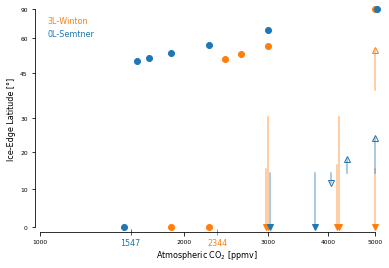

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
save_plot = True
plot_winton = True
plot_unlim = True

labelsize=8
ticksize=6

offset=0.01

fig, ax = plt.subplots(figsize=(6,4))
ax.spines['left'].set_position(('outward',5))
ax.spines['bottom'].set_position(('outward',5))
 
    
# color_winton simulations
if plot_winton:
    color_winton='C1'

    
    a=plot_simulation_merged(ax,1875, 90, 0, color_winton, 1)
    plot_simulation_merged(ax,2250, 90, 0, color_winton, 1)
    plot_simulation_merged(ax,2437, 90, 50.5, color_winton, 1)
    plot_simulation_merged(ax,2625, 90, 52.6, color_winton, 1)
    plot_simulation_merged(ax,3000, 90, 56.3, color_winton, 1)
    plot_simulation_merged(ax,5000, 90, 90, color_winton, 1)
    plot_simulation_merged(ax,3000, 15.3, 0, color_winton, 3, -offset)
    plot_simulation_merged(ax,5000, 15.3, 0, color_winton, 3)
    plot_simulation_merged(ax,5000, 38.9, 54.3, color_winton, 4)
    #plot_simulation_merged(ax,10000, 15.3, 6, color_winton, 3)
    plot_simulation_merged(ax,3000, 30.2, 0, color_winton, 3)
    plot_simulation_merged(ax,4219, 30.2, 0, color_winton, 3)
    plot_simulation_merged(ax,4219, 16.6, 0, color_winton, 3, -offset)
    
    
# hice_unlim simulations
if plot_unlim:
    color_unlim='C0'
    a=plot_simulation_merged(ax,1500, 90, 0, color_unlim, 1)
    plot_simulation_merged(ax,1594, 90, 49.54, color_unlim, 1)
    plot_simulation_merged(ax,1688, 90, 51.07, color_unlim, 1)
    plot_simulation_merged(ax,1875, 90, 53.20, color_unlim, 1)
    plot_simulation_merged(ax,2250, 90, 56.85, color_unlim, 1)
    plot_simulation_merged(ax,3000, 90, 65, color_unlim, 1) #5m limited, but always under 5m
    plot_simulation_merged(ax,3000, 14.46, 0, color_unlim, 3, offset)
    plot_simulation_merged(ax,3750, 14.46, 0, color_unlim, 3)    
    #plot_simulation_merged(ax,3907, 14.46, 15.1, color_unlim, 2)
    plot_simulation_merged(ax,4063, 14.46, 11.5, color_unlim, 3)
    #plot_simulation_merged(ax,4219, 14.46, 16.23, color_unlim, 2)
    plot_simulation_merged(ax,4375, 14.46, 18.2, color_unlim, 4, )
    plot_simulation_merged(ax,5000, 14.46, 24, color_unlim, 4)
    #plot_simulation_merged(ax,5000, 11.6, 14.3, color_unlim, 2)
    plot_simulation_merged(ax,5000, 90, 90, color_unlim, 1, offset) # limited, but no ice at all
    #plot_simulation_merged(ax,10000, 14.46, 18, color_unlim, 4)


#ax.hlines([np.sin(np.radians(56.3)),np.sin(np.radians(50.5)),np.sin(np.radians(52.6))],1500,3500)
ax.set_yticks([np.sin(np.radians(0)),np.sin(np.radians(10)),np.sin(np.radians(20)),np.sin(np.radians(30)),np.sin(np.radians(45)),np.sin(np.radians(60)),np.sin(np.radians(90))])
ax.set_ylim(-0.1,1.1)
ax.set_xlim(1000,10500)
ax.set_xlabel("Atmospheric CO$_2$ [ppmv]",size=labelsize)
ax.set_ylabel("Ice-Edge Latitude [°]",size=labelsize)

plt.tick_params(axis='both', which='major', labelsize=ticksize)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()


ax.set_xscale('log')

ax.set_xticks([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] )
ax.set_xticklabels([1000,2000,3000,4000,5000,'','','','',10000] )
ax.set_xlim(1000,5000)
ax.set_ylim(0,1)

# extra ticks at bifurcation points
winton_bif=2344
#semtner_bif=1641
semtner_bif=1547

ax.vlines([winton_bif],-0.04,-0.01,color=color_winton,lw=1,clip_on=False)
ax.vlines([semtner_bif],-0.04,-0.01,color=color_unlim,lw=1,clip_on=False)
#ax.axvline(semtner_bif,-20,0.1)
ax.annotate(winton_bif,(winton_bif,0.1),xytext=(winton_bif,-0.05),color=color_winton,ha='center',va='top',clip_on=False, fontsize=labelsize)
ax.annotate(semtner_bif,(semtner_bif,0.1),xytext=(semtner_bif,-0.05),color=color_unlim,ha='center',va='top',clip_on=False, fontsize=labelsize)

ax.set_yticklabels([0,10,20,30,45,60,90])
legend_color(ax,["3L-Winton", "0L-Semtner"],2, labelsize)
#plt.legend((a,b),("Winton", "Semtner hice_unlim"))
if save_plot:
    if plot_winton:
        plt.savefig("plots/bifurcation_winton_merged_rev1.pdf")